In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import pandas as pd
import math
import scipy.misc
from scipy.stats import linregress
from scipy import interpolate
from scipy.fftpack import *
import scipy.signal
#import sympy as sy
#sy.init_session()

/home/daniel/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[[ 36.    44.     1.  ]
 [ 37.5   42.5    0.96]
 [ 39.1   40.9    0.92]
 [ 40.5   39.5    0.88]
 [ 42.    38.     0.86]
 [ 43.6   36.4    0.83]
 [ 45.    35.     0.79]
 [ 46.5   33.5    0.76]
 [ 47.7   32.3    0.74]
 [ 49.4   30.6    0.71]]


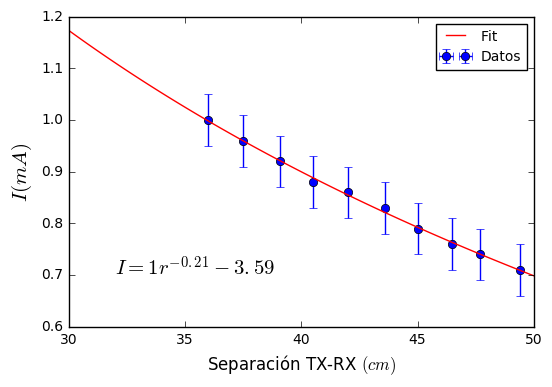

In [2]:
act_1_data = np.loadtxt("microondas_1.csv", delimiter=',', skiprows=1)
x_rad=act_1_data[:,0]
inv_x_rad = 1./(x_rad)

def func(x_inv, a, b, c, n):
    return a*(x_inv)**n + c
             
xdata=np.linspace(30, 50, 100)
xdata_mod=1./(xdata)
plt.errorbar(act_1_data[:, 0], act_1_data[:, 2], yerr=0.05, xerr=0.05,fmt='o', label='Datos')
popt, pcov = curve_fit(func, inv_x_rad, act_1_data[:, 2])
plt.plot(xdata, func(xdata_mod, *popt), 'r-', label='Fit')
plt.xlabel(u'Separación TX-RX $(cm)$', fontsize=12)
plt.ylabel('$I(mA)$', fontsize=15)
plt.text(32, 0.7, "$I = %.0f r^{-%.2f}%.2f$"%(popt[1], popt[3], popt[2]), fontsize=15)
plt.legend(loc=0, fontsize=10)
plt.gcf()
plt.savefig('act1_plot.png', transparecy=True)
print act_1_data


In [3]:
print np.std(2*(act_1_data[:, 0]-np.roll(act_1_data[:, 0], 1))[1:])
print act_1_data[:, 0]

0.273973955688
[ 36.   37.5  39.1  40.5  42.   43.6  45.   46.5  47.7  49.4]


In [22]:
print 2*1.48
print np.average(2*(act_1_data[:, 0]-np.roll(act_1_data[:, 0], 1))[1:])
print (np.average(2*(act_1_data[:, 0]-np.roll(act_1_data[:, 0], 1))[1:])-2.85)/2.85


2.96
0.133506606021
0.0448343079922


[[ 1.          0.99673866]
 [ 0.99673866  1.        ]]


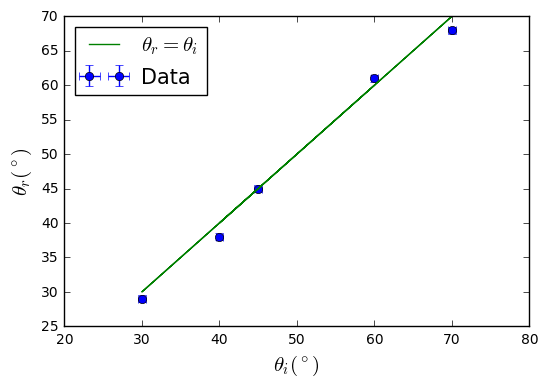

In [5]:
#Act 2
act_2_data=np.loadtxt('microondas_2.csv', dtype=float, skiprows=1, delimiter=',')
plt.errorbar(act_2_data[:,0], act_2_data[:,1],yerr=0.5, xerr=0.5 ,fmt='o', label='Data')
plt.plot(act_2_data[:,0], act_2_data[:,0], label='$\\theta_r=\\theta_i$')
print np.corrcoef(act_2_data[:,0], act_2_data[:,1])
plt.xlabel('$\\theta_i(^\circ)$', fontsize=15)
plt.ylabel('$\\theta_r(^\circ)$', fontsize=15)
plt.legend(loc=0, fontsize=15)
plt.gcf()
plt.savefig('act2_plot.png', transparency=True)

# Act 3

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90.] [ 1.    0.99  0.91  0.77  0.58  0.35  0.14  0.02  0.    0.  ]
[[ 1.          0.99575901]
 [ 0.99575901  1.        ]]
[[ 1.          0.94812984]
 [ 0.94812984  1.        ]]


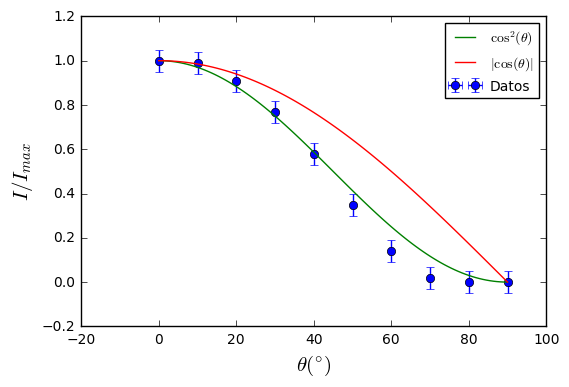

In [6]:
data_micro_3 = np.loadtxt("microondas_3.csv", delimiter=',', skiprows=1)
plt.errorbar(data_micro_3[:, 0], data_micro_3[:, 1]/max(data_micro_3[:,1]),yerr=0.05,xerr=0.5, fmt='o', label='Datos')
x=np.linspace(0, np.pi/2, 100)
plt.plot(np.rad2deg(x), (np.cos(x))**2, label='$\cos^2(\\theta)$')
plt.plot(np.rad2deg(x), np.abs(np.cos(x)), label='$|\cos (\\theta)|$')
print data_micro_3[:, 0], data_micro_3[:, 1]
plt.legend(loc=0, fontsize=10)
plt.xlabel("$\\theta (^{\circ})$", fontsize=15)
plt.ylabel('$I/I_{max}$', fontsize=15)
plt.gcf()
plt.savefig('act3_plot.png', transparecy=True)
print np.corrcoef(data_micro_3[:, 1]/max(data_micro_3[:,1]), (np.cos(np.deg2rad(data_micro_3[:, 0])))**2 )
print np.corrcoef(data_micro_3[:, 1]/max(data_micro_3[:,1]), abs(np.cos(np.deg2rad(data_micro_3[:, 0]))) )

In [7]:
#Con polarizador y TX, RX perpendiculares
angs_perp=np.array([0, np.pi/4, np.pi/2])
curr_perp=np.array([0, 0.42, 0])
#Con dos polarizadores
ang_rel=np.array([0, 45, 90])
curr_rel=np.array([0.16, 0.14, 0])
#Refracción
thetas_m=np.round(8+np.random.random(10), 0)
print np.mean(thetas_m)
theta_m = np.deg2rad(8)
theta_1=np.deg2rad(22.)
theta_2=(theta_1+theta_m)
print np.rad2deg(theta_2)
n1=np.sin(theta_2)/np.sin(theta_1)
print n1
th1, th2, thm,  n_1, n_2 = sy.symbols('theta_1 theta_2 theta_m n_1 n_2')
(sy.diff(sy.sin(theta_1 + thm)/sy.sin(theta_1), thm)*0.5).subs(thm, theta_m).evalf()

8.6
30.0
1.33473358128


NameError: name 'sy' is not defined

[[ 1.         0.9433773]
 [ 0.9433773  1.       ]]


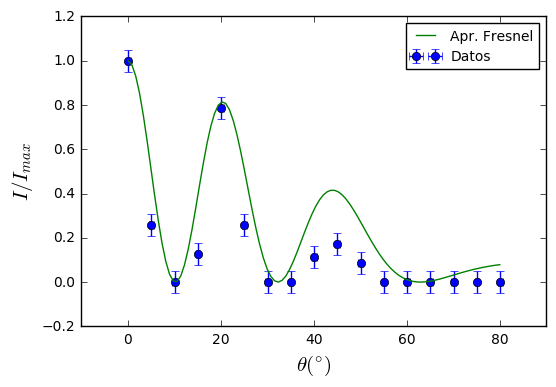

In [24]:
#Doble rendija
#La distancia entre TX y RX en este es de 100-35
d= 0.08
a=0.02
ang_rend=np.arange(0.1, 85, 5)
curr_rend=np.array([0.7, 0.18, 0, 0.09, 0.55, 0.18, 0, 0, 0.08, 0.12, 0.06, 0, 0, 0, 0, 0, 0])
def itty(theta, d=8,a=2):
    return np.cos((np.pi/2.85)*d*np.sin(theta))**2 *(np.sin((np.pi*a/2.85)*np.sin(theta))/((np.pi*a/2.85)*np.sin(theta)))**2
                  
th_t = np.deg2rad(np.linspace(0.1, 80, 100))
plt.errorbar(ang_rend, curr_rend/max(curr_rend), yerr=0.05,xerr=0.5,fmt='o', label="Datos")
plt.plot(np.rad2deg(th_t), itty(th_t), label="Apr. Fresnel")
plt.xlabel("$\\theta (^{\circ})$", fontsize=15)
plt.ylabel('$I/I_{max}$', fontsize=15)
plt.legend(loc=0, fontsize=10)
plt.gcf()
plt.savefig('act5_plot.png', transparency=True)
print np.corrcoef(curr_rend/max(curr_rend), itty(np.deg2rad(ang_rend)) )

In [35]:
for i in range(len(ang_rend)):
    print ang_rend[i], '&', curr_rend[i], '\\\\'

0.1 & 0.7 \\
5.1 & 0.18 \\
10.1 & 0.0 \\
15.1 & 0.09 \\
20.1 & 0.55 \\
25.1 & 0.18 \\
30.1 & 0.0 \\
35.1 & 0.0 \\
40.1 & 0.08 \\
45.1 & 0.12 \\
50.1 & 0.06 \\
55.1 & 0.0 \\
60.1 & 0.0 \\
65.1 & 0.0 \\
70.1 & 0.0 \\
75.1 & 0.0 \\
80.1 & 0.0 \\


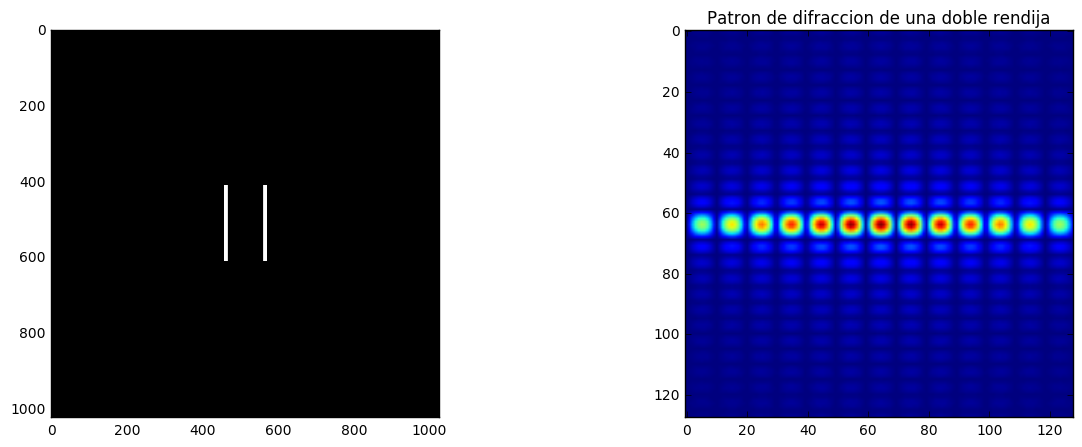

In [36]:
#El lienzo.
dslit=np.zeros([1024, 1024], dtype=float)
#Pupil function.
dslit[512-100:512+100, 460-5:460+5]=1
dslit[512-100:512+100, 564-5:564+5]=1
#La norma de la transformada de Fourier.
dslitFFT=np.abs(fft2(dslit))
#La función fftshift.
dslit_fhf=scipy.fftpack.fftshift(dslitFFT)
#Se crea la imagen.
dSlit, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(dslit, cmap="Greys_r")
ax[1].imshow(dslit_fhf[512-128/2:512+128/2, 512-128/2:512+128/2])
plt.title("Patron de difraccion de una doble rendija")
i=np.abs(dslit_fhf[512-128/2:512+128/2, 512-128/2:512+128/2][64, :])**2
i0=max(i)


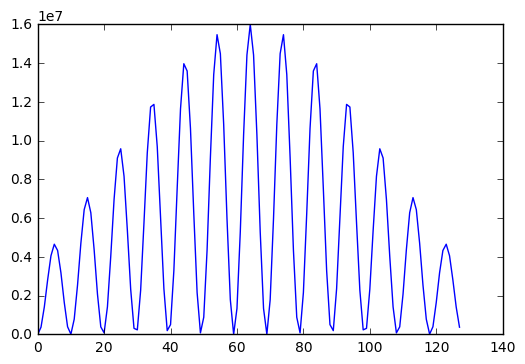

In [37]:
plt.plot(i)
ax=plt.gca()


In [44]:
#Fabry Perot

sep_init_TX_RX=96.5-27 #cm
ref_TX_init = 49.5-27.
ref_RX_init = 71.5-27.
dist_refs=ref_RX_init-ref_TX_init
min_all=np.array([69.4, 71., 72.2, 73.8, 75.2, 76.5, 78.1, 79.5, 81, 82.5,83.9])
min_all-=27.
dist_min_min=(np.roll(min_all, -1)-min_all)[:-1]
print dist_min_min
mean_min_min=np.mean(dist_min_min)
def wavelen_FP(d_m_m):
    return 2*d_m_m
print wavelen_FP(mean_min_min), '+', 2*np.std(dist_min_min)

[ 1.6  1.2  1.6  1.4  1.3  1.6  1.4  1.5  1.5  1.4]
2.9 + 0.256904651573


In [43]:
print '&', '$d_{min-min}(\pm 0.05cm)$'
for i in range(len(dist_min_min)):
    print '&',dist_min_min[i], '\\\\'
print 'Promedio', '&', mean_min_min, '\\\\'

& $d_{min-min}(\pm 0.05cm)$
& 1.6 \\
& 1.2 \\
& 1.6 \\
& 1.4 \\
& 1.3 \\
& 1.6 \\
& 1.4 \\
& 1.5 \\
& 1.5 \\
& 1.4 \\
Promedio & 1.45 \\


In [12]:
#Fibra óptica
dist_init_TX=39.#cm
dist_init_RX=93.5
init_measure=0.5#mA
'''La fibra óptica "atrapa" los rayos divergentes, esto debido a la diferencia de 
indices de refracción, de esta forma, la intensidad observada es mucho mayor que la inicial.'''

'''Hay lecturas bastante significativas antes de 236° '''
ang_cero=236-180
print ang_cero
ang_crit=np.rad2deg(np.arcsin(1/n1))
print ang_crit

56
48.5222676009
